# Capstone Project Case Study 1- How Does a Bike-Share Naviate Speedy Success?
**For this Case Study, I will be Using the [Cyclistic Dataset](https://www.kaggle.com/datasets/mihelic/cyclistic)**
    **I am Joy Chuks- Nwosu, but I'd love to be addessed as Ivory**
    **Date: 1st June 2022**
    
 **Introduction**
I will be Showing you my approach to this project as a Jnr. Data Analyst working in a Marketing analyst team at Cyclistic.(PS: this is hypothetically because it is for my Google Data Analytics Certificate)
You will find the full document for this case study [here](https://www.coursera.org/learn/google-data-analytics-capstone)
I will following the steps of the data analysis process: **ask, prepare, process, analyze, share, and act.**

**Back Story - About Cyclistic**
Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

The director of marketing, **Lily Moreno** believes the company’s future success depends on maximizing the number of annual memberships.

**Challenge:** Understand how casual riders and annual members use Cyclistic bikes differently.
**Goal:** design a new marketing strategy to convert casual riders into annual members. for this my team an I will need approval from The notoriously detail-oriented executive team

As earlier mentioned, I will be following the Data analysis Process to tackle this;

# Ask
**What is the question that will guide my team to solve this problem? **
* What is the problem you are trying to solve? 
According to the director, Lily, Cyclistic's future success depends on an increase in annual membership, thus the problem here is maximizing annual membership.
* How can your insights drive business decisions?
The insight will help my team come up with strategies to increase annual members

**Business Task:** Find how casual riders use the bikes differently from members and how we can influence them to be annual members

# Prepare
For this, data was provided by goggle in the course as it has been lisenced and made available by Motivate International Inc.You can find that [here](https://divvy-tripdata.s3.amazonaws.com/index.html). but since i will be using kaggle, I will go ahead to use the [Cyclistic dataset](https://www.kaggle.com/datasets/mihelic/cyclistic) provided by Kaggle which is a 12 months divvy-tripdata(from 202004 to 202103) the company provided.

# Process
Like I have earlier mentioned, I will be using R as a language in Kaggle. I will like to go ahead and assume the data has integrity because it is an internal data provided by the company, however, will check for inconsistencies in the columns and rows, outliers, clean the data and prepare for analysis. As we progress, will make markdown reports of steps taken. The dataset which is in different .csv files for each month will be merged to one dataframe for easy analysis

**Will first load the libraries i will be using for my analysis and they are**
*  Tidyverse which helps wrangle data
*  Lubridate which helps wrangle data attributes
*  ggplot2  which helps visualize data

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
library(ggplot2)

In [4]:
#import divvy-tripdata (.csv files) here
# dt here stands for divvy-tripdata and the numbers represent each month of the data from april 2020 which is the first month to march 2021 which is the 12th month


dt1 <- read.csv("../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv")
dt2 <- read.csv("../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv")
dt3 <- read.csv("../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv")
dt4 <- read.csv("../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv")
dt5 <- read.csv("../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv")
dt6 <- read.csv("../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv")
dt7 <- read.csv("../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv")
dt8 <- read.csv("../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv")
dt9 <- read.csv("../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv")
dt10 <- read.csv("../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv")
dt11 <- read.csv("../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv")
dt12 <- read.csv("../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv")
 #combine them into a data frame i will call tripdata usind a rbind function
tripdata <- rbind(dt1,dt2, dt3, dt4, dt5, dt6, dt7, dt8, dt9, dt10, dt11, dt12)



In [5]:
#use a dim function to see the dimension of the dataframe that is how big our dataframe is
dim(tripdata)

[1] 3489748      13

In [6]:
#find out the structure of my dataframe
str(tripdata)

'data.frame':	3489748 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : chr  "86" "503" "142" "216" ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr  "152" "499" "255" "657" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num

**From the dataframe structure above, we can see that the data has 3,489,748 rows or observations and 13 columns or variables**

In [7]:
#will check my dataframe now to see the first 6 columns
head(tripdata)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


In [8]:
#still exploring the dataframe, will check for the column names 
colnames(tripdata)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [9]:
glimpse(tripdata)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

**Now that we have a quick overview of what our dataframe looks like, we will clean the data and prepare for analysis**

# Data Cleaning
**Remove duplicated row using the ride_id column**

In [10]:
# tripdata_nd will be the new name of the dataframe with no duplicates
#tripdata is the name of the dataframe we are working with
#used the print function to ask R to return the number of duplicated rows removed from the tripdata dataframe 

tripdata_nd <-tripdata[!duplicated(tripdata$ride_id),]
print(paste("Removed", nrow(tripdata) - nrow(tripdata_nd), "duplicated rows"))

[1] "Removed 209 duplicated rows"


**Parse datetime Column**
This is because when data is impoerted, the date column is read as an object data type or a character(string) format. Which is why the lubridate library was loaded, so we will be converting our datetime column from a date to a POXIXct. using the as.POSIXct method converts a datetime string into a POXITct class and stores both a data and time with an associated time zone

*Reference*: Read this [here](https://www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r)


In [11]:
#parsing date-time columns
tripdata_nd$started_at <- as.POSIXct(tripdata_nd$started_at, "%Y-%m-%d %H:%M:%S")
tripdata_nd$ended_at <- as.POSIXct(tripdata_nd$ended_at, "%Y-%m-%d %H:%M:%S")

# Manipulating the Data
* Add columns that list the date, month, day and year of each ride 


In [12]:
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level

tripdata_nd$date <- as.Date(tripdata_nd$started_at) #The default format is yyyy-mm-dd
tripdata_nd$month <- format(as.Date(tripdata_nd$date), "%m")
tripdata_nd$day <- format(as.Date(tripdata_nd$date), "%d")
tripdata_nd$year <- format(as.Date(tripdata_nd$date), "%Y")
tripdata_nd$day_of_week <- format(as.Date(tripdata_nd$date), "%A")


* Add a "ride_length" calculation to tripdata_nd (in seconds)


In [13]:
tripdata_nd$ride_length <- difftime(tripdata_nd$ended_at,tripdata_nd$started_at)

In [14]:
# Inspect the structure of the columns
str(tripdata_nd)

'data.frame':	3489539 obs. of  19 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct, format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : chr  "86" "503" "142" "216" ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr  "152" "499" "255" "657" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 42 ...
 $ end_lng           : num  -87.7 -

*  Convert "ride_length" from Factor to numeric so we can run calculations on the data


In [15]:
is.factor(tripdata_nd$ride_length)
tripdata_nd$ride_length <- as.numeric(as.character(tripdata_nd$ride_length))
is.numeric(tripdata_nd$ride_length)


[1] FALSE

[1] TRUE

* Add a "ride_time_min" calculation of total time of a bike ride in Minutes

In [16]:
tripdata_nd <- tripdata_nd %>%
    mutate(ride_time_m = as.numeric(tripdata_nd$ended_at - tripdata_nd$started_at) / 60)
summary(tripdata_nd$ride_time_m)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-29049.97      7.88     14.52     26.48     26.63  58720.03 

* Add a "year_month" this shows the year and month columns together in one column

In [17]:
tripdata_nd <- tripdata_nd %>%
    mutate(year_month = paste(strftime(tripdata_nd$started_at, "%Y"),
                              "-",
                              strftime(tripdata_nd$started_at, "%m"),
                              paste("(",strftime(tripdata_nd$started_at, "%b"), ")", sep="")))
unique(tripdata_nd$year_month)

[1] "2020 - 04 (Apr)" "2020 - 05 (May)" "2020 - 06 (Jun)" "2020 - 07 (Jul)"
 [5] "2020 - 08 (Aug)" "2020 - 09 (Sep)" "2020 - 10 (Oct)" "2020 - 11 (Nov)"
 [9] "2020 - 12 (Dec)" "2021 - 01 (Jan)" "2021 - 02 (Feb)" "2021 - 03 (Mar)"

* Add a "weekday" to show weekdays with their number in the days of the week. This will help should we decide to determine the weekly pattern of travel of the riders


In [18]:
tripdata_nd <- tripdata_nd %>%
    mutate(weekday = paste(strftime(tripdata_nd$ended_at, "%u"), "-", strftime(tripdata_nd$ended_at, "%a")))
unique(tripdata_nd$weekday)

[1] "7 - Sun" "5 - Fri" "3 - Wed" "2 - Tue" "6 - Sat" "4 - Thu" "1 - Mon"

# Remove "bad" data
* The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative. We will create a new version of the dataframe (v2) since data is being removed



In [19]:
tripdata_nd_v2 <- tripdata_nd[!(tripdata_nd$start_station_name == "HQ QR" | tripdata_nd$ride_length<0),]


 **Save the new cleaned data as a .CSV**

In [20]:
tripdata_nd %>%
  write.csv("tripdata_clean.csv")

# Analye
**Conduct a Descriptive analysis**
* **Descriptive analysis on ride_length(all figures in seconds)**


In [21]:
mean(tripdata_nd_v2$ride_length) #straight average (total ride length / rides)
median(tripdata_nd_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(tripdata_nd_v2$ride_length) #longest ride
min(tripdata_nd_v2$ride_length) #shortest ride


[1] 1677.049

[1] 874

[1] 3523202

[1] 0

In [22]:
#the four lines above can be condensed to one line using summary()
summary(tripdata_nd_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     476     874    1677    1601 3523202 

In [23]:
#for a refresher let us see an overview of our v2 dataset
summary(tripdata_nd_v2)

   ride_id          rideable_type        started_at                 
 Length:3479196     Length:3479196     Min.   :2020-04-01 00:00:30  
 Class :character   Class :character   1st Qu.:2020-07-14 18:48:36  
 Mode  :character   Mode  :character   Median :2020-08-29 14:36:43  
                                       Mean   :2020-09-10 01:41:08  
                                       3rd Qu.:2020-10-20 20:26:31  
                                       Max.   :2021-03-31 23:59:08  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2020-04-01 00:10:45   Length:3479196     Length:3479196    
 1st Qu.:2020-07-14 19:20:26   Class :character   Class :character  
 Median :2020-08-29 15:09:12   Mode  :character   Mode  :character  
 Mean   :2020-09-10 02:09:05                                        
 3rd Qu.:2020-10-20 20:42:57                                        
 Max.   :2021-04-06 11:00:11      

* **Compare members and casual users**


In [24]:
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual, FUN = mean)
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual, FUN = median)
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual, FUN = max)
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual, FUN = min)


tripdata_nd_v2$member_casual,tripdata_nd_v2$ride_length
<chr>,<dbl>
casual,2698.1722
member,966.9067


tripdata_nd_v2$member_casual,tripdata_nd_v2$ride_length
<chr>,<dbl>
casual,1272
member,689


tripdata_nd_v2$member_casual,tripdata_nd_v2$ride_length
<chr>,<dbl>
casual,3341033
member,3523202


tripdata_nd_v2$member_casual,tripdata_nd_v2$ride_length
<chr>,<dbl>
casual,0
member,0


**Data Distribution**
**Casual vs Members**
* counting the percentage of the data that is about members and about cauals

In [25]:
tripdata_nd_v2 %>% 
    group_by(member_casual) %>% 
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(tripdata_nd_v2)) * 100)

member_casual,count,%
<chr>,<int>,<dbl>
casual,1427121,41.0187
member,2052075,58.9813


*** The average ride time by each day for members vs casual users**

In [26]:
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual + tripdata_nd_v2$day_of_week, FUN = mean)

tripdata_nd_v2$member_casual,tripdata_nd_v2$day_of_week,tripdata_nd_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,2566.0303
member,Friday,948.1130
casual,Monday,2698.5630
member,Monday,920.2266
casual,Saturday,2817.3583
member,Saturday,1067.6161
casual,Sunday,3044.5856
member,Sunday,1093.0548
casual,Thursday,2578.1268


* **Fix the days of the week above that are out of order**

In [27]:
tripdata_nd_v2$day_of_week <- ordered(tripdata_nd_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


* **Run the average ride time by each day for members vs casual users**

In [28]:
aggregate(tripdata_nd_v2$ride_length ~ tripdata_nd_v2$member_casual + tripdata_nd_v2$day_of_week, FUN = mean)


tripdata_nd_v2$member_casual,tripdata_nd_v2$day_of_week,tripdata_nd_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,3044.5856
member,Sunday,1093.0548
casual,Monday,2698.5630
member,Monday,920.2266
casual,Tuesday,2429.2405
member,Tuesday,907.8393
casual,Wednesday,2418.8408
member,Wednesday,918.8948
casual,Thursday,2578.1268


* **Analyze ridership data by type and weekday**


In [29]:
#creates weekday field using wday(), then groups by usertype and weekday, calculates the number of rides and average duration 
#calculates the average duration and sort

tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  
 group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
  ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,262271,3044.5856
casual,Mon,151169,2698.5630
casual,Tue,145267,2429.2405
casual,Wed,158402,2418.8408
casual,Thu,166402,2578.1268
casual,Fri,208551,2566.0303
casual,Sat,335059,2817.3583
member,Sun,265299,1093.0548
member,Mon,267336,920.2266


* **Analyse ridership data distribution by month**

In [30]:
tripdata_nd_v2 %>%
    group_by(year_month) %>%
    summarise(count = length(ride_id),
              '%' = (length(ride_id) / nrow(tripdata_nd_v2)) * 100,
              'members_p' = (sum(member_casual == "member") / length(ride_id)) * 100,
              'casual_p' = (sum(member_casual == "casual") / length(ride_id)) * 100,
              'Member x Casual Perc Difer' = members_p - casual_p)

year_month,count,%,members_p,casual_p,Member x Casual Perc Difer
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2020 - 04 (Apr),84725,2.435189,72.13337,27.86663,44.266745
2020 - 05 (May),200102,5.751386,56.60013,43.39987,13.200268
2020 - 06 (Jun),342536,9.845263,54.88036,45.11964,9.760726
2020 - 07 (Jul),549735,15.800633,51.12409,48.87591,2.248174
2020 - 08 (Aug),619592,17.808482,53.41467,46.58533,6.829333
2020 - 09 (Sep),530826,15.257146,56.65774,43.34226,13.315474
2020 - 10 (Oct),386742,11.115844,62.62909,37.37091,25.258182
2020 - 11 (Nov),258851,7.439966,66.03799,33.96201,32.075982
2020 - 12 (Dec),131139,3.769233,77.12580,22.87420,54.251596


# Visualize Data
* **Visualize the distribution of data between members and casuals**

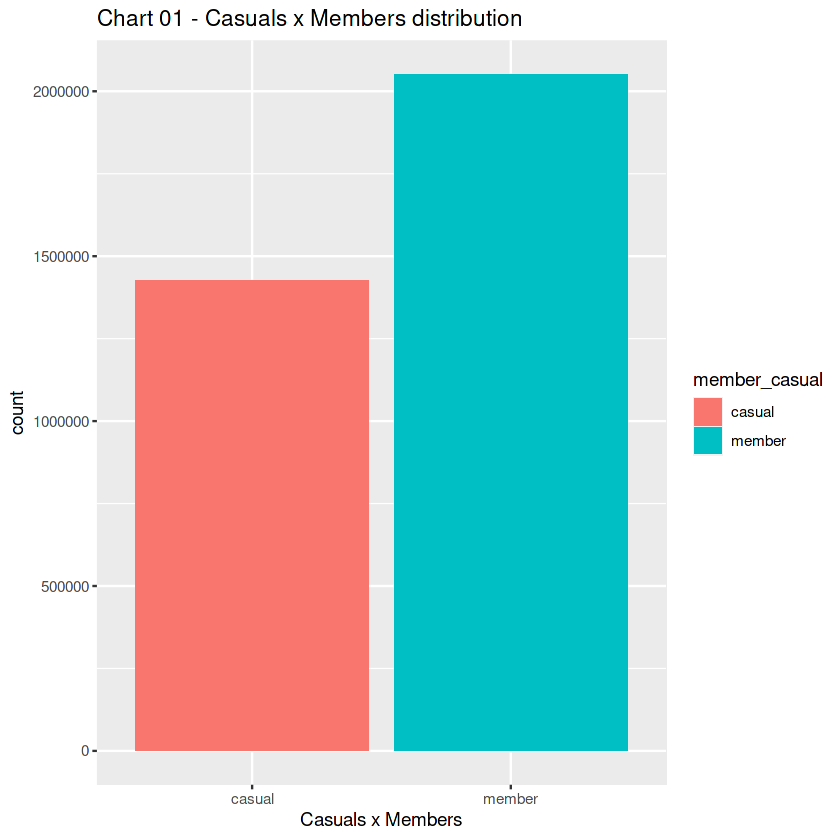

In [31]:
ggplot(tripdata_nd_v2, aes(member_casual, fill=member_casual)) +
    geom_bar() +
    labs(x="Casuals x Members", title="Chart 01 - Casuals x Members distribution")

From the chart above we can see that there are more members than casuals in this dataset with a proportional percentage of approximately 59% : 41%

* **Visualize the number of rides by rider type**


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


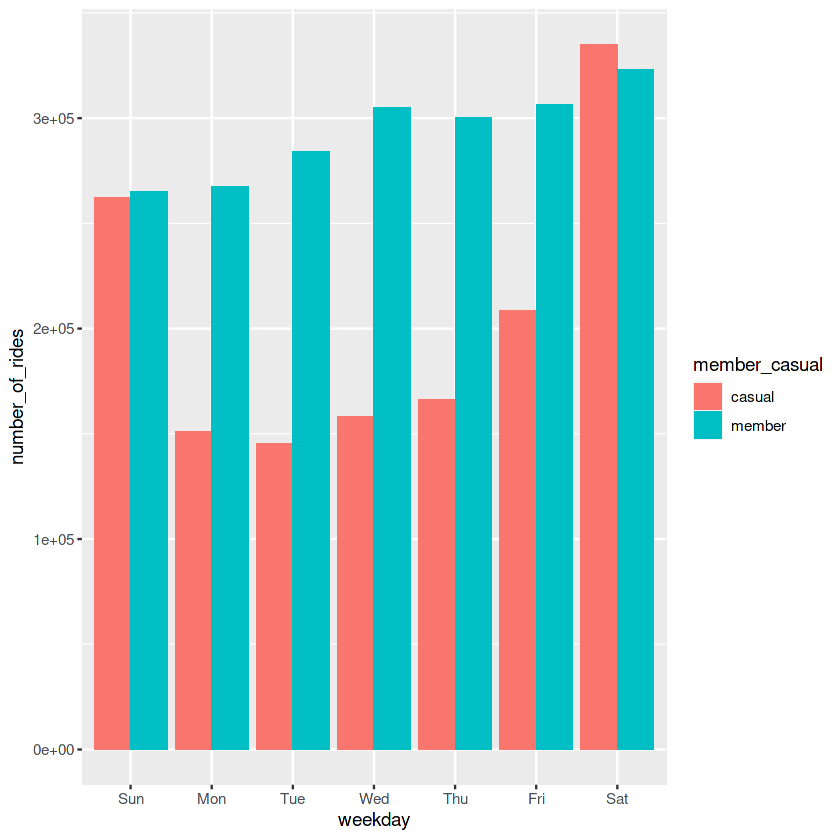

In [32]:
tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


We can from the visuals above see that;
* There are more rides on weekednds, saturday and sunday
* An increased number of rides: Casual riders ride more on saturdays.


* **Visualize ridership datatype by month**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


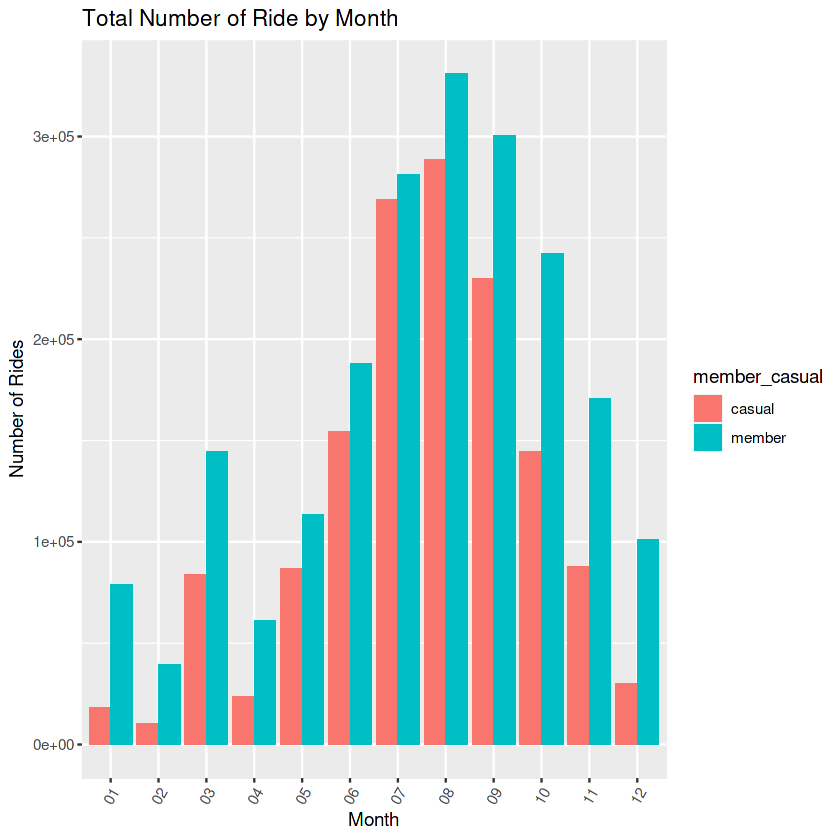

In [33]:
tripdata_nd_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title="Total Number of Ride by Month", x = "Month", y = "Number of Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

From the chart above we can see that August had the highest number of rides

* **Create a visualization for average duration**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


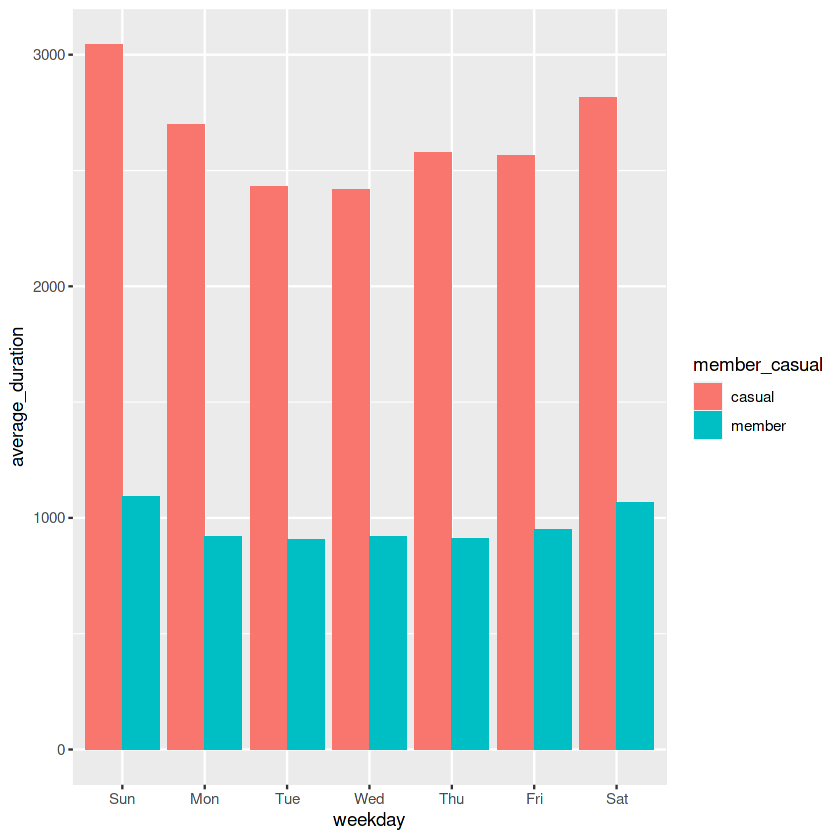

In [34]:
tripdata_nd_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


On the average;
* The duration of casual rides re higher than that of members

* **Analyzing member ridersip alone**


In [35]:
#Create a new data frame for member riders
tripdata_member <-  filter(tripdata_nd_v2, member_casual == "member")

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


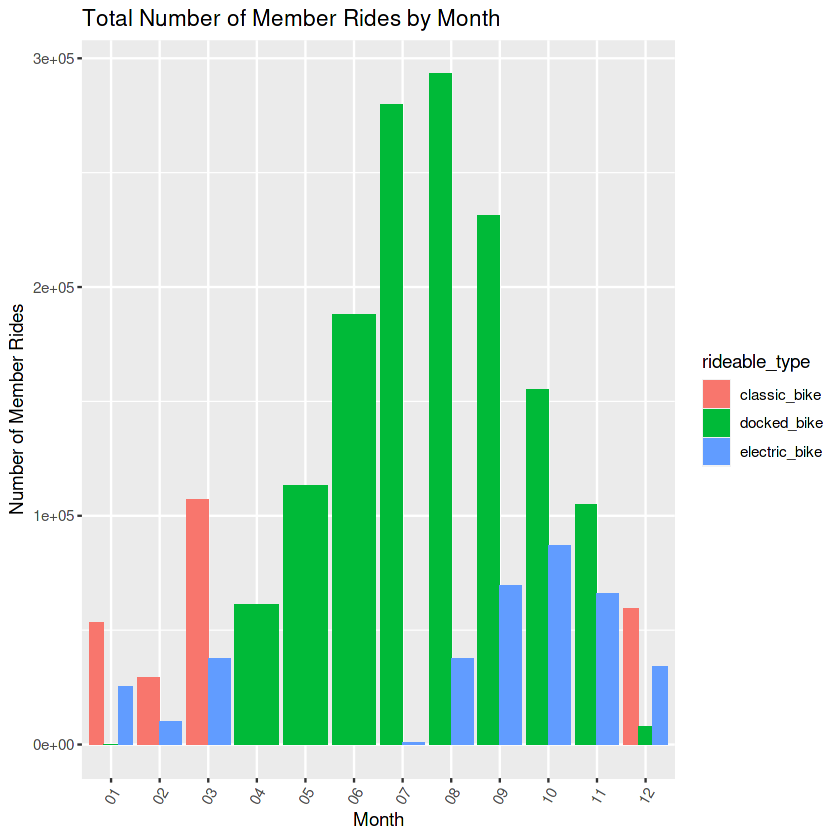

In [36]:
#Analyze member ridership data by ridable_type and month

tripdata_member %>% 
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, month)	%>% 
  ggplot(aes(x = month, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + labs(title="Total Number of Member Rides by Month", x = "Month", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

From the Chart above we can see that there are 3 ridable types;
* classic_bikes
* docked_bikes
* electric_bikes

From the months of April to June only docked_biles were used
From the month of April more docked bikes were used.
Electric bikes were usedin January, Febuary, March and December.

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


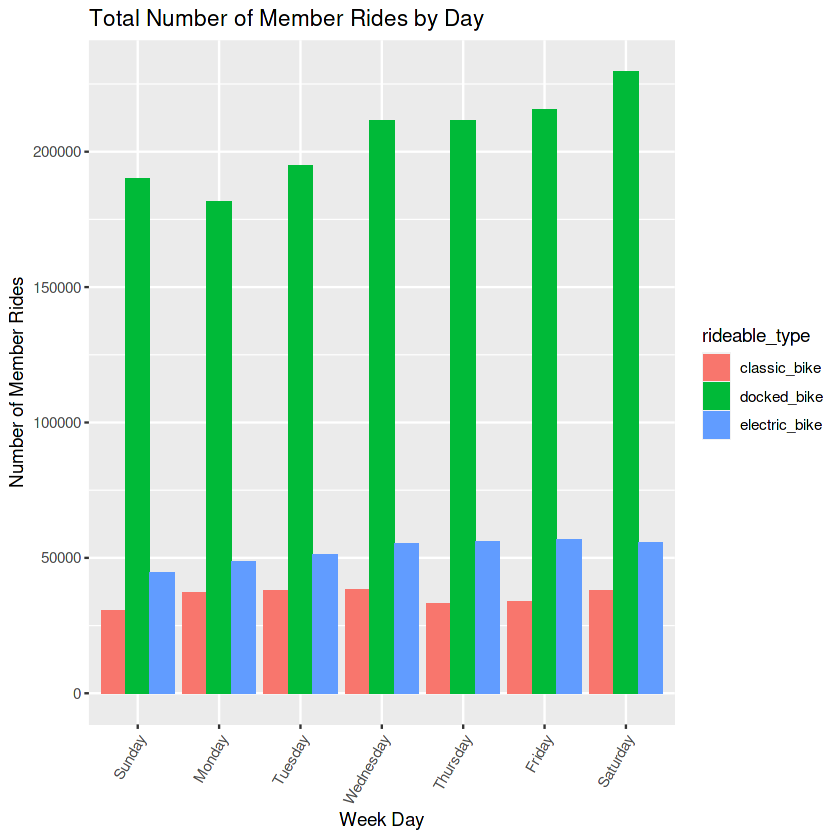

In [37]:
# Analyze member ridership data by ridable_type and day of the week


tripdata_member %>% 
  group_by(rideable_type, day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, day_of_week)%>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + labs(title="Total Number of Member Rides by Day", x = "Week Day", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))

The chart above reemphasies what i have already established in the previous charts
* There are more rides on saturday than the rest of the day
From the chart we can see that dorked_bikes are the preferred bike and mostly used ridable_bike

# Share
Having gained some insights into our data,from the analysis performed above, we were able;
* Understand how casual bike riders and annual members use bike differently
* My audience are the executive members and Lily Moreno and the best way to them is through a visual presentation
* Data visualization can help me share my findings
* I will be visualizing this analysis here on using the kaggle notebook, and the presentation will be accessible to my audience




# Act
**Conclusion based on my analysis**
* We have two audience, the casual riders and the members
* Members make up approximately 59% of the dataset while the Casuals make up ~41%
* August had the highest number of rides and the weekday with the highest number of rides is Saturday
* In each month there are more member riders than casual riders
* In each day there are also more member riders than casual riders except on saturday
* The weekend had more ridership data than the rest of the week
* The choice of ridable_bikes influence the number of rides 
* Members ride more on the weekdays 
* Casual riders have more ride duration than member riders 

My team and business can apply this insight when preparing a marketing campaign the number of members by turning the casual riders

Further analysis could be done to improve my findings, like the routes taken by riders and how it infuences their choice of ridable_bikes or duration, geographical location and impact on becoming a member and the effect of temperature or seasons on these choices.

# Recommendation
* The duration of rides for members should be increased as a enticing attraction for casual riders
* A digital marketing campaign should be done to create awareness for membership option with enticing benefits like discounts and giveaways, there should also be campaigns to promote going green and reducing pollution. events can be organized in collaboration with companies that promote green economy.
* The months with low classic ridable bikes should be put into consideration and a provision for more of themm should be made.


# Finally

Thankyou for reading my first Capstone project for my Google Data Analytics certification course.
I also want to thank the whole google team for an amaing course that have provided me with such an amazing opportunity to learn and not just learn but also put my lessons to practice and have exposed me to community of data lovers here on kaggle.


# **Refernces**
* Learnt how to import and merge my data files from a youtube video Kaggle / Cyclistic Bikeshare Introduction can be accessed[here](http://https://www.youtube.com/watch?v=THk4hPG8y5o&t=311s)
* Used a kaggle notebooks as a guide. can be accessed [here](https://www.kaggle.com/code/jhelisonuchoa/google-data-analytics-capstone-case-study-1/notebook) and [here](https://www.kaggle.com/code/moirangthem/cyclistic-google-data-analytics-capstone-project/notebook)
* Learnt how to convert datetime to POSIXct [here](https://www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r#:~:text=POSIXct%20stores%20both%20a%20date,beginning%20at%201%20January%201970.)